## Semantic Segmentation

Semantic segmentation, which is a pixel-level labeling for image classification, is an important technique for the scene understanding. Because each pixel is labeled as belonging to a given semantic class. 

Autonomous driving will be one of the revolutionary technologies in the near future in terms of the impact on the lives of people living in industrially developed
countries. An autonomous vehicle must sense its surroundings and act safely to reach a certain target. Such functionality is carried out by using several types of classifiers. 

In a typical task of scene understanding, the classes could be road, street, traffic signs, street markings, cars, pedestrians, sidewalks, trees. 


### In this notebook, we are implementing U-net model which can detect capture the semantic information and differentiate between different objects around in the scene. 

In [0]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

TensorFlow 2.x selected.


'2.1.0-rc1'

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


### Dataset link

https://drive.google.com/file/d/1GT3k4nPHLmU6AbQldYhw0c2rTOxAgNUW

In [0]:
import os
os.chdir('/content/drive/My Drive/AIML Notes/Segmentation/')
path = '.'

In [0]:
ls

data_semantics.zip  model.h5  model.json  testing/  training/


In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/data_semantics.zip','r') as z:
    z.extractall()

In [0]:
pwd

'/content/drive/My Drive/AIML Notes/Segmentation'

In [0]:
project_path = "/content/drive/My Drive/AIML Notes/Segmentation/"

In [0]:
#Image Settings -

IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128


In [0]:
#Getting the image list 

original  = os.listdir('./training/image_2')

In [0]:
print(original)

['000105_10.png', '000079_10.png', '000022_10.png', '000154_10.png', '000189_10.png', '000120_10.png', '000027_10.png', '000147_10.png', '000031_10.png', '000018_10.png', '000179_10.png', '000160_10.png', '000064_10.png', '000055_10.png', '000001_10.png', '000080_10.png', '000028_10.png', '000037_10.png', '000169_10.png', '000112_10.png', '000097_10.png', '000193_10.png', '000106_10.png', '000030_10.png', '000044_10.png', '000088_10.png', '000170_10.png', '000087_10.png', '000111_10.png', '000008_10.png', '000173_10.png', '000110_10.png', '000032_10.png', '000033_10.png', '000098_10.png', '000186_10.png', '000086_10.png', '000172_10.png', '000100_10.png', '000129_10.png', '000017_10.png', '000139_10.png', '000102_10.png', '000195_10.png', '000069_10.png', '000073_10.png', '000197_10.png', '000134_10.png', '000194_10.png', '000123_10.png', '000178_10.png', '000011_10.png', '000029_10.png', '000164_10.png', '000021_10.png', '000043_10.png', '000006_10.png', '000039_10.png', '000126_10.pn

In [0]:
masks  = os.listdir('./training/semantic')

In [0]:
print(masks)

['000105_10.png', '000079_10.png', '000022_10.png', '000154_10.png', '000189_10.png', '000120_10.png', '000027_10.png', '000147_10.png', '000031_10.png', '000018_10.png', '000179_10.png', '000160_10.png', '000064_10.png', '000055_10.png', '000001_10.png', '000080_10.png', '000028_10.png', '000037_10.png', '000169_10.png', '000112_10.png', '000097_10.png', '000193_10.png', '000106_10.png', '000030_10.png', '000044_10.png', '000088_10.png', '000170_10.png', '000087_10.png', '000111_10.png', '000008_10.png', '000173_10.png', '000110_10.png', '000032_10.png', '000033_10.png', '000098_10.png', '000186_10.png', '000086_10.png', '000172_10.png', '000100_10.png', '000129_10.png', '000017_10.png', '000139_10.png', '000102_10.png', '000195_10.png', '000069_10.png', '000073_10.png', '000197_10.png', '000134_10.png', '000194_10.png', '000123_10.png', '000178_10.png', '000011_10.png', '000029_10.png', '000164_10.png', '000021_10.png', '000043_10.png', '000006_10.png', '000039_10.png', '000126_10.pn

In [0]:
#Separating  mask and images 
# masks = []
# original = []
# for filename in mylist:
#     if filename.endswith('.png'):
#         masks.append(filename)
#     if filename.endswith('.jpg'):
#         original.append(filename)

In [0]:
#Sorting
original.sort()
masks.sort()

In [0]:
#Checkout image names
print(original[-1])
print(masks[-1])
print(original[1])
print(masks[1])


000199_10.png
000199_10.png
000001_10.png
000001_10.png


In [0]:
import cv2
import matplotlib.pyplot as plt

In [0]:
#Get the data -  X and y
import numpy as np

y = np.zeros((len(masks), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)

X = np.zeros((len(original), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)

for file in original:
    n = original.index(file)
    path1 = os.path.join('./training/image_2', file)
    #path1 = './images/Abyssinian_34.jpg'
    img = cv2.imread(path1,1)
    try:
#         print(img.shape)
        img = cv2.resize(img, (128,128))
#         print(img.shape)
#         img = img[..., np.newaxis]
        X[n] = img/ 255
        file2 = masks[n]
        #n = masks.index(file)
        path2 = os.path.join('./training/semantic_rgb', file2)
        # Load images
              
        mask = np.array(cv2.imread(path2, 1))
#         print(mask.shape)
#         mask = (mask<12)*1.0
        mask = cv2.resize(mask, (128, 128))
#         mask = mask[:, :, :]
#         mask = mask[..., np.newaxis]
#         print(mask.shape)
#         mask = 1.0*(mask[:,:,0]>12)
        y[n] = mask/255
#         y[n,:,:] = np.squeeze(mask)
#         print(y.shape)
    except Exception as e:
        print(e)
        print(path1)


In [0]:
#Check the data
print(X.shape)
print(y.shape)

(200, 128, 128, 3)
(200, 128, 128, 3)


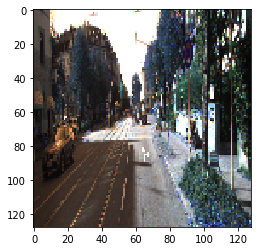

In [0]:
#Check the images
plt.imshow(X[1])

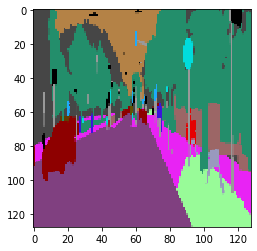

In [0]:
plt.imshow(y[1])

(375, 1242, 3)


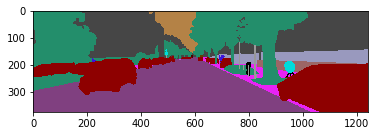

In [0]:
a = './training/semantic_rgb/000000_10.png'
img = cv2.imread(a, 1)
print(img.shape)
plt.imshow(img)

(128, 128, 3)


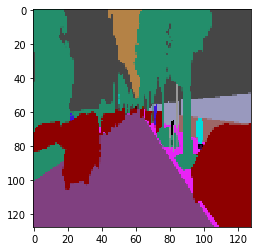

In [0]:
img = cv2.resize(img, (128, 128))
print(img.shape)
# img = img[:,:, :]
plt.imshow(img)

In [0]:
#Install segmentation models
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-2_xv2pjg
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-2_xv2pjg
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.0-cp36-none-any.whl size=33585 sha256=fffa1c62078f4ea2a63f2edb9520f1600544f9c07bbd914c12771c289a23c6ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-kho22fvd/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [0]:
#Import libraries
import segmentation_models
segmentation_models.set_framework('tf.keras')
from segmentation_models import Unet
from segmentation_models.backbones.backbones_factory import Backbones
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model

In [0]:
from sklearn.model_selection import train_test_split

# Split train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=2019)

In [0]:
BACKBONE = 'resnet34'
preprocess_input = Backbones.get_preprocessing(BACKBONE)

In [0]:
x_train = preprocess_input(X_train)
x_val = preprocess_input(X_valid)

In [0]:
x_val.shape

(30, 128, 128, 3)

In [0]:
x_train.shape

(170, 128, 128, 3)

In [0]:
#Build your model 

N = x_train.shape[-1]

base_model = Unet(backbone_name='inceptionv3', encoder_weights='imagenet')

inp = Input(shape=(128, 128, N))
l1 = Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels
out = base_model(l1)
l2 = Conv2D(3, (1, 1))(out)
model = Model(inp, l2, name=base_model.name)
model.summary()

87916544/87910968 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 128, 128, 3)       12        
_________________________________________________________________
model (Model)                multiple                  29933105  
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 128, 128, 3)       6         
Total params: 29,933,123
Trainable params: 29,896,707
Non-trainable params: 36,416
_________________________________________________________________


In [0]:
base_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 multiple             864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma multiple             96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         multiple             0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [0]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.math.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

In [0]:
# compile model
model.compile('Adam', loss=loss, metrics=[dice_coefficient])

In [0]:
# fit model
model.fit(
    x=x_train,
    y=y_train,
    batch_size=10,    
    epochs=100,
    validation_data=(x_val, y_valid),
)

Train on 170 samples, validate on 30 samples
170/170 [==============================] - 22s 128ms/sample - loss: 1.8551 - dice_coefficient: 0.3535 - val_loss: 1.8930 - val_dice_coefficient: 0.3937


In [0]:
model.evaluate(x_val, y_valid, verbose=1)

30/30 [==============================] - 3s 103ms/sample - loss: 1.8916 - dice_coefficient: 0.3940


[1.8915687799453735, 0.3940449]

In [0]:
# Predict on train, val and test
preds_train = model.predict(x_train, verbose=1)
preds_val = model.predict(x_val, verbose=1)

import numpy as np

# Threshold predictions
# preds_train_t = (preds_train > 0.5).astype(np.uint8)
# preds_val_t = (preds_val > 0.5).astype(np.uint8)

30/30 [==============================] - 0s 2ms/sample


In [0]:
preds_train[0].shape

(128, 128, 3)

In [0]:
#Save weights
from tensorflow.keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
import matplotlib.pyplot as plt

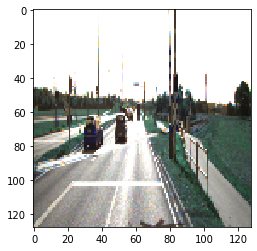

In [0]:
plt.imshow(x_train[2])

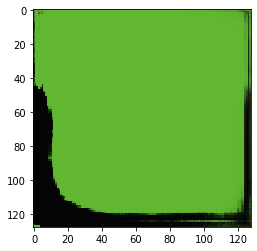

In [0]:
plt.imshow(preds_train[2])